In [90]:
import networkx as nx
from gurobipy import *
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

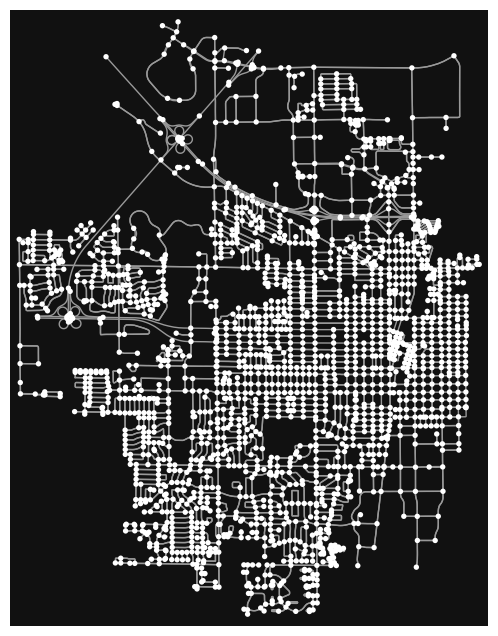

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [68]:
place_name = 'Champaign, IL, USA'
G = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G)

In [113]:
gas_stations=[]
color=[]
label_list={}
for i in G.nodes():
    if i == 6564045080:
        color.extend(['k'])
    elif i == 38093814.00:
        color.extend(['k'])
    else:
        if np.random.rand() < 0.05:
            gas_stations.append(i)
            label_list[i]=str(i)
            color.extend(['r'])
        else:
            color.extend(['b'])
            label_list[i]=''
print(len(gas_stations))
print(len(G.nodes()))
print(list(G.nodes())[0],list(G.nodes())[1],list(G.nodes())[len(G.nodes())-1])

118
2170
37945137 37945139 10155571003


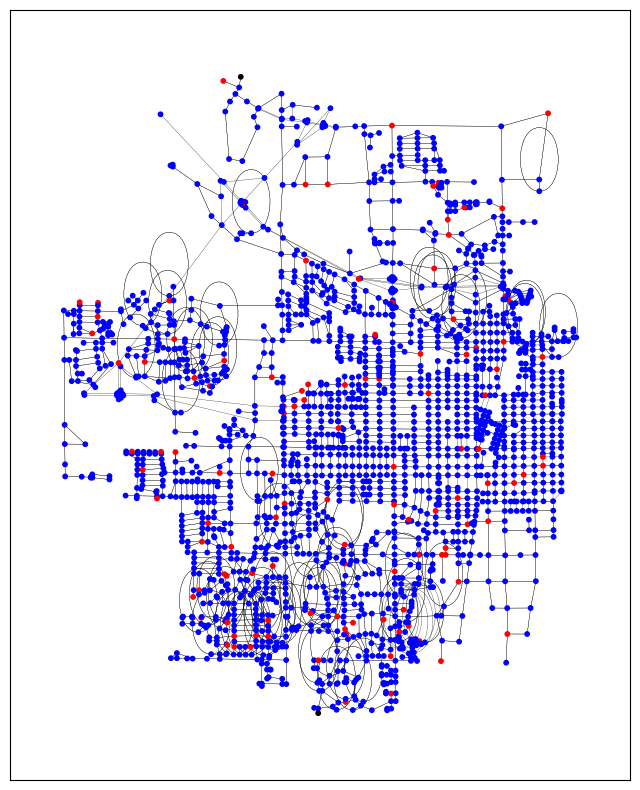

In [114]:
# pos=nx.spring_layout(G)
pd.options.display.float_format = '{:.2f}'.format
pos={}
coordinates = pd.DataFrame(columns=['ID','x','y'])
for u, data in G.nodes(data=True):
    pos[u]=(data['x'],data['y'])
    coordinates.loc[len(coordinates.index)]=[int(u),data['x'],data['y']]
coordinates.head()
plt.rcParams['figure.figsize'] = [8, 10]
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(data=False),node_size=10,node_color=color)
nx.draw_networkx_edges(G,pos,edgelist=G.edges(data=False),width=0.2,arrows=False)
# nx.draw_networkx_labels(G,pos,labels=label_list)
plt.show()

## Gurobi Model
Inputs:
Shortest Path
Gas stations
networkx graph

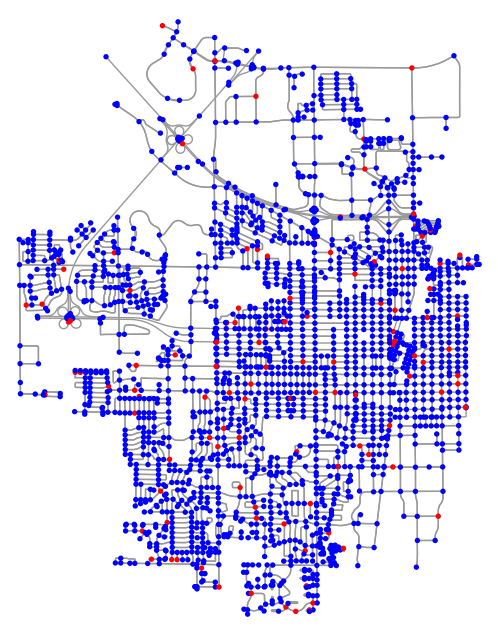

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [73]:
ox.plot_graph(G,node_color=color,bgcolor='w')

In [76]:
print(G.nodes(data=True))

[(37945137, {'y': 40.1163778, 'x': -88.2702829, 'street_count': 4}), (37945139, {'y': 40.117389, 'x': -88.270301, 'street_count': 4}), (37945140, {'y': 40.11836, 'x': -88.270312, 'street_count': 4}), (37945142, {'y': 40.120148, 'x': -88.270335, 'street_count': 4}), (37945145, {'y': 40.121343, 'x': -88.270336, 'street_count': 4}), (37945147, {'y': 40.121667, 'x': -88.270346, 'street_count': 1}), (37945237, {'y': 40.115563, 'x': -88.264781, 'street_count': 3}), (37945255, {'y': 40.115281, 'x': -88.266444, 'street_count': 3}), (37945265, {'y': 40.114403, 'x': -88.266583, 'street_count': 3}), (37945269, {'y': 40.114055, 'x': -88.266576, 'street_count': 3}), (37945271, {'y': 40.113631, 'x': -88.266573, 'street_count': 3}), (37945273, {'y': 40.112731, 'x': -88.266557, 'street_count': 3}), (37945287, {'y': 40.129725, 'x': -88.243614, 'street_count': 4}), (37945288, {'y': 40.129728, 'x': -88.242373, 'street_count': 4}), (37945290, {'y': 40.129736, 'x': -88.241116, 'street_count': 4}), (3794529

In [ ]:
def get_opt_refuel_cost(G, gas_stations, path):
    opt_fuel_cost=0

    return opt_fuel_cost

In [98]:
coordinates.head()

,ID,x,y
0,37945137.0,-88.270283,40.116378
1,37945139.0,-88.270301,40.117389
2,37945140.0,-88.270312,40.118360
3,37945142.0,-88.270335,40.120148
4,37945145.0,-88.270336,40.121343


In [111]:
df2=coordinates.sort_values(by='x')
df3=df2.sort_values(by='y')
df3.head()

,ID,x,y
1562,38093814.00,-88.27,40.08
1538,38091463.00,-88.26,40.08
1301,38064772.00,-88.26,40.08
1568,38094435.00,-88.26,40.08
1198,38053091.00,-88.27,40.08


In [112]:
df2=coordinates.sort_values(by='x',ascending=False)
df3=df2.sort_values(by='y',ascending=False)
df3.head()

,ID,x,y
2112,6564045080.00,-88.28,40.16
2138,7026037732.00,-88.29,40.16
2113,6564045081.00,-88.28,40.16
139,37968110.00,-88.28,40.16
1939,2012580780.00,-88.29,40.16
